#**Week 4: Modeling + Regression**

Our goal for this week is to create a few basic models based on our dataset, and introduce regression. One choice of model would be to ignore any relationships between variables, and predict the same number for each individual – i.e., predicting a constant. We call this constant a summary statistic because it summarizes the data in our sample, and the model is known as a constant model. 

Let's see how it works!

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/millenopan/Cardiovascular-Health-Project/blob/main/processed-cleveland.csv?raw=true'
hd = pd.read_csv(url)
hd.target = hd.target.replace({2:1, 3:1, 4:1}) 
url = 'https://github.com/millenopan/Cardiovascular-Health-Project/blob/main/heart-failure.csv?raw=true'
hf = pd.read_csv(url)

For this introduction, let's start with the heart failure dataset.

In [ ]:
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


-----------------------------

Let's begin by trying to see if we can come up with a good constant value to predict or summarize platelets in the individuals here. Let's set a basic number for now.

In [ ]:
platelets_guess = 300000
platelets_guess

300000

We now want to see how accurate our guess is. Let us first see how accurately our guess predicts the platelets for the first row of our dataset. In order to be able to do so, we need some metric of how “good” or “bad” our predictions are. This is where we introduce loss functions: numeric equations that can give us a value and measurement to provide us more insight on how to weigh/judge our guesses and decisions.

We can start with two simple metrics: the squared loss and absolute loss. Much as the name implies, we'll be looking at the squared difference and absolute value difference for our chosen guess compared to actual values in our dataset.

In [ ]:
first_platelets = hf["platelets"][0]
first_platelets

265000.0

In [ ]:
squared_error = (first_platelets-platelets_guess)**2
squared_error

1225000000.0

In [ ]:
absolute_error = abs(first_platelets-platelets_guess)
absolute_error

35000.0

We can see that the error values seem to be giving us a number, but its really difficult to actually extrapolate data and compare between these two. This means that our guess probably isn't great at capturing the first individual's platelets count. However, we want to find out how "good" or "bad" our model is on average for all values in the dataset. This leads us into, the root mean squared error and mean absolute error. The reason for using the root mean squared error instead of just the mean squared error is to ensure that the final error value is in the same units as the variable we're predicting.

In [ ]:
root_mean_squared_error = np.mean((hf["platelets"]-platelets_guess)**2)**0.5
root_mean_squared_error

104289.55156522471

In [ ]:
mean_absolute_error = np.mean(abs(hf["platelets"]-platelets_guess))
mean_absolute_error

79618.55936454848

Both of these seem to be doing pretty poorly, so let's try a few different values: the mean and median of both datasets. Let's take a look.

In [ ]:
def root_mean_squared_error(actual, predicted):
  return np.mean((actual-predicted)**2)**0.5

In [ ]:
def mean_absolute_error(actual, predicted):
  return np.mean(abs(actual-predicted))

In [ ]:
mean_val = np.mean(hf["platelets"])
actual_vals = hf["platelets"]
rmse_mean_val = root_mean_squared_error(actual_vals, mean_val)
mae_mean_val = mean_absolute_error(actual_vals, mean_val)
print("Mean Value, RMSE, MAE")
mean_val, rmse_mean_val, mae_mean_val

Mean Value, RMSE, MAE


(263358.02926421416, 97640.54765451424, 66909.44761803556)

In [ ]:
median_val = np.median(hf["platelets"])
actual_vals = hf["platelets"]
rmse_median_val = root_mean_squared_error(actual_vals, median_val)
mae_median_val = mean_absolute_error(actual_vals, median_val)
print("Median Value, RMSE, MAE")
median_val, rmse_median_val, mae_median_val

Median Value, RMSE, MAE


(262000.0, 97649.99124298953, 66902.51086956522)

The mean and median seem pretty close. Hmm, does this make sense? Let's take a look at the distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


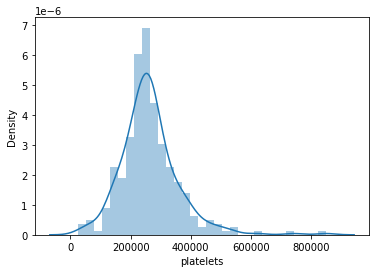

In [ ]:
sns.distplot(hf['platelets']);

It seems to check out compared to the distribution of our data.

---------------------------------

In general, we decide which loss function we want to use to evaluate our model before we start and then tweak our model such that this value is minimized. We can see that the root mean squared error is lower for the mean cost, and the mean absolute error for the median cost. Hence, if we used the root mean squared error as our loss function, we would select the mean cost as our constant, and if we used the mean absolute error as our loss function, we would select the median cost as our constant.

We can see that our error values are lower than before, which means our model has improved! The values are, however, still quite high. We should probably try bringing in other variables to contribute to making a model that is better at predicting platelets in individuals.

-----------------------------------

We will start by showcasing linear regression. Much as the name implies, a linear regression is a linear approach where we show a scalar relationship between our dependent and independent variables. A linear model is of the form: $y = a_0 + a_1x_1 + a_2x_2 + .. + a_nx_n$, where $x_i$ represents our independent variables and the $a_i$ are our coefficients. For this example, let's start by just using one independent variable. This model will be of the form $y = wx + c$ as a result.

In [ ]:
from sklearn.linear_model import LinearRegression #linear regression from sklearn

First, we want to divide our data into a training data and test data. We only have a finite amount of data on hand, so spliting this means we will be able to use the training data to train our model, and the test data to evaluate how well the model does on "unseen" data. We use the train_test_split function for this, and by keeping test_size as 0.2, we 80% of the data is used as training data, and 20% is used as test data.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(hf, test_size=0.2, random_state=85) #random_state basically prevents a random train and test split: Used for demo purposes for consistency

In [ ]:
X_train = train.loc[:, ["age"]]
y_train = train["platelets"]
X_test = test.loc[:, ["age"]]
y_test = test["platelets"]

In [ ]:
display(X_train, y_train, X_test, y_test)

,age
291,60.0
90,70.0
106,55.0
197,65.0
261,62.0
...,...
83,79.0
52,60.0
51,53.0
196,45.0


291    133000.00
90     249000.00
106    263000.00
197    259000.00
261    283000.00
         ...    
83     172000.00
52     263358.03
51     418000.00
196    263358.03
160    242000.00
Name: platelets, Length: 239, dtype: float64

,age
277,70.000
63,45.000
189,40.000
134,81.000
298,50.000
150,72.000
27,70.000
32,50.000
256,65.000
94,58.000


277     25100.00
63     385000.00
189    275000.00
134    231000.00
298    395000.00
150    235000.00
27     284000.00
32     319000.00
256    294000.00
94     327000.00
149    228000.00
188    201000.00
100    298000.00
293    179000.00
28     153000.00
153    263358.03
112    252000.00
79     324000.00
138    221000.00
129    227000.00
193    160000.00
289    390000.00
285    336000.00
200     73000.00
95     219000.00
276    327000.00
102    149000.00
64     263358.03
111    228000.00
120    210000.00
239    263358.03
122    228000.00
62     254000.00
260    203000.00
130    249000.00
74     266000.00
208    283000.00
205    362000.00
16     262000.00
295    270000.00
61     216000.00
99     221000.00
77     237000.00
38     305000.00
174    281000.00
158    235000.00
34     188000.00
117    507000.00
141    348000.00
23     368000.00
119    263358.03
240    533000.00
168    270000.00
199    263358.03
231    185000.00
8      263358.03
151    244000.00
66     213000.00
105    621000.

In [ ]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can now use our model to predict the platelets count based on the age of the individual. Let's try using our model to predict the platelets for the training data and the test data. We can then use the rmse function that we created to evaluate our model.

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
training_error = root_mean_squared_error(y_train, y_pred_train)
test_error = root_mean_squared_error(y_test, y_pred_test)
print("The training error is " + str(training_error) + " and the test error is " + str(test_error))

The training error is 96952.0169697921 and the test error is 100507.31888341445


In this week's document, the error shown above will be described a bit more in detail for you to understand what is going on. Let's try testing our model on a sample!

In [ ]:
test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
277,70.0,0,582,1,38,0,25100.0,1.10,140,1,0,246,0
63,45.0,0,582,0,35,0,385000.0,1.00,145,1,0,61,1
189,40.0,0,244,0,45,1,275000.0,0.90,140,0,0,174,0
134,81.0,0,4540,0,35,0,231000.0,1.18,137,1,1,107,0
298,50.0,0,196,0,45,0,395000.0,1.60,136,1,1,285,0


In [ ]:
model.predict(X_test)[0] # use our model to predict the first entry

252911.34273178762

In [ ]:
model.predict(X_test)[1] # what about the second one?

274555.6232267873

Hmm... that actually seems quite a bit off. Maybe we can do something to make our model better! As you work through the walkthrough notebook, don't forget that you can always apply these to the heart disease dataset as well!

In [ ]:
from sklearn.linear_model import LinearRegression #linear regression from sklearn
from sklearn.model_selection import train_test_split
train_e, test_e = train_test_split(hf, test_size=0.25,)


In [ ]:
# training model predicted ejection fraction using age
X_train_e = train_e.loc[:, ["age"]]
y_train_e = train_e["ejection_fraction"]
X_test_e = test_e.loc[:, ["age"]]
y_test_e = test_e["ejection_fraction"]

In [ ]:
model = LinearRegression() 
model.fit(X_train_e, y_train_e)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train_e = model.predict(X_train_e)
y_pred_test_e = model.predict(X_test_e)

In [ ]:
training_error_e = root_mean_squared_error(y_train_e, y_pred_train_e)
test_error_e = root_mean_squared_error(y_test_e, y_pred_test_e)
print("The training error is " + str(training_error_e) + " and the test error is " + str(test_error_e))


The training error is 11.761190002114931 and the test error is 11.896160115068614


In [ ]:
model.predict(X_test_e)[0]

38.43689122561294

In [ ]:
test_e.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,60.0,1,47,0,20,0,204000.0,0.7,139,1,1,73,1
17,45.0,0,582,0,14,0,166000.0,0.8,127,1,0,14,1
42,70.0,0,571,1,45,1,185000.0,1.2,139,1,1,33,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
102,80.0,0,898,0,25,0,149000.0,1.1,144,1,1,87,0


In [ ]:
test_e["smoking"] = test_e["smoking"].fillna(0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_e["smoking"].isnull()


75     False
17     False
42     False
6      False
102    False
175    False
18     False
8      False
23     False
120    False
130    False
139    False
9      False
203    False
133    False
54     False
295    False
81     False
271    False
277    False
135    False
95     False
11     False
110    False
99     False
282    False
197    False
236    False
137    False
189    False
265    False
206    False
141    False
96     False
117    False
104    False
181    False
21     False
27     False
113    False
259    False
235    False
168    False
227    False
193    False
258    False
26     False
149    False
276    False
46     False
251    False
268    False
142    False
224    False
61     False
98     False
230    False
92     False
280    False
246    False
Name: smoking, dtype: bool

In [ ]:
# attemot to hot one encode, keeps on erroring out :(
def hot_encode_diabetes(data):
    """
    One-hot-encodes diabetes
    """
    vec_enc = DictVectorizer()
    vec_enc.fit(data[['diabetes']].to_dict(orient='records'))
    diabetes_data = vec_enc.transform(data[['diabetes']].to_dict(orient='records')).toarray()
    diabetes_cats = vec_enc.get_feature_names()
    print(diabetes_cats)
    diabetes = pd.DataFrame(diabetes_data, columns=diabetes_cats)
    data = pd.concat([data, diabetes], axis=1)
    data = data.drop(columns=diabetes_cats[0])
    return data

In [ ]:
from sklearn.feature_extraction import DictVectorizer


In [ ]:
training_data_diabetes = hot_encode_diabetes(train_e)
training_data_diabetes


,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1.0,103.0,35.0,0.0,179000.00,0.9,136.0,1.0,1.0,270.0,0.0
294,62.0,0.0,61.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0,0.0
296,45.0,0.0,2060.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0,0.0
297,45.0,0.0,2413.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,0.0


In [ ]:
# multilinear model predicting platlets 
X_train_ml = train_e[["age","serum_creatinine", "serum_sodium"]]
y_train_ml = train_e["platelets"]
X_test_ml = test_e[["age","serum_creatinine", "serum_sodium"]]
y_test_ml = test_E["platelets"]

In [ ]:
model_ml = LinearRegression() 
model_ml.fit(X_train_ml, y_train_ml)
y_pred_train_ml = model_ml.predict(X_train_ml)
y_pred_test_ml = model_ml.predict(X_test_ml)

In [ ]:
training_error_ml = root_mean_squared_error(y_train_ml, y_pred_train_ml)
test_error_ml = root_mean_squared_error(y_test_ml, y_pred_test_ml)
print("The training error is " + str(training_error_ml) + " and the test error is " + str(test_error_ml))

The training error is 96719.1060200278 and the test error is 100354.73073492778


In [ ]:
model_ml.predict(X_test_ml)[0]

259044.24025690663

In [ ]:
test_e.head(1) #model still off

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0


In [ ]:
# another multilinear model with more features
X_train_ml2 = train_e[["age","serum_creatinine", "serum_sodium", "ejection_fraction"]]
y_train_ml2 = train_e["platelets"]
X_test_ml2 = test_e[["age","serum_creatinine", "serum_sodium", "ejection_fraction"]]
y_test_ml2 = test_e["platelets"]

In [ ]:
model_ml2 = LinearRegression() 
model_ml2.fit(X_train_ml2, y_train_ml2)
y_pred_train_ml2 = model_ml2.predict(X_train_ml2)
y_pred_test_ml2 = model_ml2.predict(X_test_ml2)

In [ ]:
training_error_ml2 = root_mean_squared_error(y_train_ml2, y_pred_train_ml2)
test_error_ml2 = root_mean_squared_error(y_test_ml2, y_pred_test_ml2)
print("The training error is " + str(training_error_ml2) + " and the test error is " + str(test_error_ml2))

The training error is 96674.25347749387 and the test error is 104967.6625010667


In [ ]:
model_ml2.predict(X_test_ml2)[0]

283804.74079490977

In [ ]:
test_e.head(1) # closer but now over estimate

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0
